<a href="https://colab.research.google.com/github/edenpsilva/Colab/blob/master/Autoencoder_5_videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando Tensonflow-GPU

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.8MB 45.7MB/s 
     |████████████████████████████████| 450kB 54.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


Importando ferramentas

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, cifar10 

from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import Conv2D, Input, Reshape, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping

#keras.backend.clear_session()  # For easy reset of notebook state.
import scipy.io

Baixando dados de treinamento

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
mat = scipy.io.loadmat("/content/drive/My Drive/Colab Notebooks/baseVid20perc.mat")

mat.keys()
train_images, test_images = mat['patchesX'],mat['Z']

#Normalizing
train_images, test_images = train_images/255., test_images/255.

#Resizing images to keras CNN input 
train_images = train_images.reshape((train_images.shape[0],
                                     train_images.shape[1],
                                     train_images.shape[2],
                                     1))

test_images = test_images.reshape((test_images.shape[0],
                                  test_images.shape[1],
                                  test_images.shape[2],
                                  1))


n_canais  = train_images.shape[-1]# número de canais da imagem

Quinto modelo

In [43]:
#ENCODER
inp = Input(shape=train_images.shape[1:])
e = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(32, (3, 3), activation='relu', padding='same')(e)
e = MaxPooling2D((2, 2))(e)
e = Flatten()(e)
e = Dense(384, activation='sigmoid')(e)

#DECODER
d = Reshape((12,16,2))(e)
#d = Conv2D(32,(3, 3), activation='relu', padding='same')(e)
d = Conv2D(32,(3, 3), activation='relu', padding='same')(d)
d = UpSampling2D((2,2))(d)
d = Conv2D(n_canais, (3, 3), activation='sigmoid', padding='same')(d)
d = UpSampling2D((2,2))(d)
d = Conv2D(n_canais, (3, 3), activation='sigmoid', padding='same')(d)
ae = Model(inp, d)
ae.summary()

#encoder para reuso
#encoder = Model(inp,  e )

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 48, 64, 1)]       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 48, 64, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 32, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 16, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 384)               2359

In [44]:
early_stopping = EarlyStopping(monitor='val_loss',
                                min_delta=0,
                                patience=10,
                                verbose=1, 
                                mode='auto')
# compile it using adam optimizer
ae.compile(optimizer="adam", loss="mse", metrics=['mse'])
#Train it by providing training images
history = ae.fit(train_images, train_images, validation_data=(test_images, test_images),epochs=500)

Train on 27253 samples, validate on 5317 samples
Epoch 1/500
27253/27253 [==============================] - 7s 249us/sample - loss: 0.0737 - mse: 0.0737 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 2/500
27253/27253 [==============================] - 6s 205us/sample - loss: 0.0718 - mse: 0.0718 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 3/500
27253/27253 [==============================] - 6s 205us/sample - loss: 0.0717 - mse: 0.0717 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 4/500
27253/27253 [==============================] - 6s 210us/sample - loss: 0.0717 - mse: 0.0717 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 5/500
27253/27253 [==============================] - 6s 207us/sample - loss: 0.0717 - mse: 0.0717 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 6/500
27253/27253 [==============================] - 6s 213us/sample - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 7/500
27253/27253 [==============================] - 6s 211us/sample - loss: 0.0337 - mse: 0.0337 -

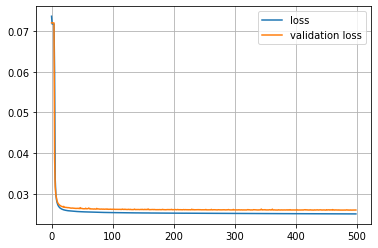

In [46]:
loss = history.history['loss']
val_loss  =history.history['val_loss']

plt.plot(loss, label='loss')

plt.plot(val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.grid(True)

(3, 48, 64, 1)


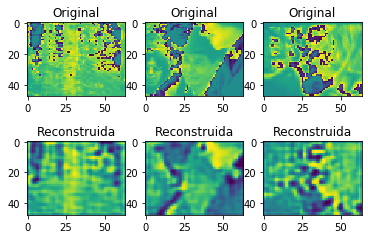

In [51]:
ind  = 3
y = ae.predict(test_images[:ind,:,:,:])
print(y.shape)
for i in range(ind):
  plt.subplot(2,ind,1+i)
  plt.imshow(test_images[i,:,:,0])
  plt.title("Original")
  plt.subplot(2,ind,ind + 1 + i)
  plt.title("Reconstruida")
  plt.imshow(y[i,:,:,0])

Modelos 2


In [57]:
#ENCODER
inp = Input(shape=train_images.shape[1:])
e = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(32, (3, 3), activation='relu', padding='same')(e)
e = MaxPooling2D((2, 2))(e)
e = Flatten()(e)
e = Dense(768, activation='sigmoid')(e)

#DECODER
d = Reshape((12,16,4))(e)
#d = Conv2D(32,(3, 3), activation='relu', padding='same')(e)
d = Conv2D(32,(3, 3), activation='relu', padding='same')(d)
d = UpSampling2D((2,2))(d)
d = Conv2D(n_canais, (3, 3), activation='sigmoid', padding='same')(d)
d = UpSampling2D((2,2))(d)
d = Conv2D(n_canais, (3, 3), activation='sigmoid', padding='same')(d)
ae = Model(inp, d)
ae.summary()

#encoder para reuso
#encoder = Model(inp,  e )

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 48, 64, 1)]       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 48, 64, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 24, 32, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 24, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 16, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 6144)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 768)               471

In [58]:
early_stopping = EarlyStopping(monitor='val_loss',
                                min_delta=0,
                                patience=10,
                                verbose=1, 
                                mode='auto')
# compile it using adam optimizer
ae.compile(optimizer="adam", loss="mse", metrics=['mse'])
#Train it by providing training images
history = ae.fit(train_images, train_images, validation_data=(test_images, test_images),epochs=200)

Train on 27253 samples, validate on 5317 samples
Epoch 1/200
27253/27253 [==============================] - 7s 248us/sample - loss: 0.0513 - mse: 0.0513 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 2/200
27253/27253 [==============================] - 6s 220us/sample - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 3/200
27253/27253 [==============================] - 6s 221us/sample - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 4/200
27253/27253 [==============================] - 6s 225us/sample - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 5/200
27253/27253 [==============================] - 6s 227us/sample - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 6/200
27253/27253 [==============================] - 6s 220us/sample - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 7/200
27253/27253 [==============================] - 6s 224us/sample - loss: 0.0273 - mse: 0.0273 -

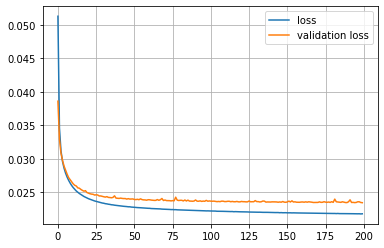

In [59]:
loss = history.history['loss']
val_loss  =history.history['val_loss']

plt.plot(loss, label='loss')

plt.plot(val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.grid(True)

(3, 48, 64, 1)


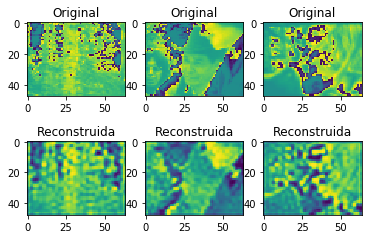

In [60]:
ind  = 3
y = ae.predict(test_images[:ind,:,:,:])
print(y.shape)
for i in range(ind):
  plt.subplot(2,ind,1+i)
  plt.imshow(test_images[i,:,:,0])
  plt.title("Original")
  plt.subplot(2,ind,ind + 1 + i)
  plt.title("Reconstruida")
  plt.imshow(y[i,:,:,0])

Modelos 3


In [4]:
#ENCODER
inp = Input(shape=train_images.shape[1:])
e = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(32, (3, 3), activation='relu', padding='same')(e)
e = MaxPooling2D((2, 2))(e)
e = Flatten()(e)
e = Dense(1536, activation='sigmoid')(e)

#DECODER
d = Reshape((12,16,8))(e)
#d = Conv2D(32,(3, 3), activation='relu', padding='same')(e)
d = Conv2D(32,(3, 3), activation='relu', padding='same')(d)
d = UpSampling2D((2,2))(d)
d = Conv2D(n_canais, (3, 3), activation='sigmoid', padding='same')(d)
d = UpSampling2D((2,2))(d)
d = Conv2D(n_canais, (3, 3), activation='sigmoid', padding='same')(d)
ae = Model(inp, d)
ae.summary()

#encoder para reuso
#encoder = Model(inp,  e )

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 64, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6144)              0         
_________________________________________________________________
dense (Dense)                (None, 1536)              943872

In [0]:
early_stopping = EarlyStopping(monitor='val_loss',
                                min_delta=0,
                                patience=10,
                                verbose=1, 
                                mode='auto')
# compile it using adam optimizer
ae.compile(optimizer="adam", loss="mse", metrics=['mse'])
#Train it by providing training images
history = ae.fit(train_images, train_images, validation_data=(test_images, test_images),epochs=200)

Train on 27253 samples, validate on 5317 samples
Epoch 1/200
27253/27253 [==============================] - 15s 540us/sample - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 2/200
27253/27253 [==============================] - 7s 250us/sample - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 3/200
27253/27253 [==============================] - 7s 251us/sample - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 4/200
27253/27253 [==============================] - 7s 256us/sample - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 5/200
27253/27253 [==============================] - 7s 250us/sample - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 6/200
27253/27253 [==============================] - 7s 252us/sample - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 7/200
27253/27253 [==============================] - 7s 256us/sample - loss: 0.0259 - mse: 0.0259 

In [0]:
loss = history.history['loss']
val_loss  =history.history['val_loss']

plt.plot(loss, label='loss')

plt.plot(val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.grid(True)

In [0]:
ind  = 3
y = ae.predict(test_images[:ind,:,:,:])
print(y.shape)
for i in range(ind):
  plt.subplot(2,ind,1+i)
  plt.imshow(test_images[i,:,:,0])
  plt.title("Original")
  plt.subplot(2,ind,ind + 1 + i)
  plt.title("Reconstruida")
  plt.imshow(y[i,:,:,0])

Modelos 4


In [63]:
#ENCODER
inp = Input(shape=train_images.shape[1:])
e = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(32, (3, 3), activation='relu', padding='same')(e)
e = MaxPooling2D((2, 2))(e)
e = Flatten()(e)
e = Dense(1536, activation='sigmoid')(e)
e = Dense(736, activation='sigmoid')(e)

#DECODER
d = Dense(1536, activation='sigmoid')(e)
d = Reshape((12,16,8))(d)#(e)
d = Conv2D(32,(3, 3), activation='relu', padding='same')(d)
d = UpSampling2D((2,2))(d)
d = Conv2D(n_canais, (3, 3), activation='sigmoid', padding='same')(d)
d = UpSampling2D((2,2))(d)
d = Conv2D(n_canais, (3, 3), activation='sigmoid', padding='same')(d)
ae = Model(inp, d)
ae.summary()

#encoder para reuso
#encoder = Model(inp,  e )

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 48, 64, 1)]       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 48, 64, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 24, 32, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 24, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 16, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 6144)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1536)              943

In [64]:
early_stopping = EarlyStopping(monitor='val_loss',
                                min_delta=0,
                                patience=10,
                                verbose=1, 
                                mode='auto')
# compile it using adam optimizer
ae.compile(optimizer="adam", loss="mse", metrics=['mse'])
#Train it by providing training images
history = ae.fit(train_images, train_images, validation_data=(test_images, test_images),epochs=200)

Train on 27253 samples, validate on 5317 samples
Epoch 1/200
27253/27253 [==============================] - 8s 301us/sample - loss: 0.0719 - mse: 0.0719 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 2/200
27253/27253 [==============================] - 8s 284us/sample - loss: 0.0717 - mse: 0.0717 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 3/200
27253/27253 [==============================] - 7s 275us/sample - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 4/200
27253/27253 [==============================] - 8s 282us/sample - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 5/200
27253/27253 [==============================] - 8s 280us/sample - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 6/200
27253/27253 [==============================] - 8s 276us/sample - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 7/200
27253/27253 [==============================] - 7s 275us/sample - loss: 0.0313 - mse: 0.0313 -

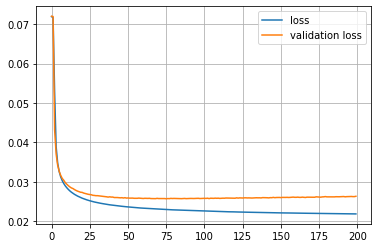

In [65]:
loss = history.history['loss']
val_loss  =history.history['val_loss']

plt.plot(loss, label='loss')

plt.plot(val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.grid(True)

(3, 48, 64, 1)


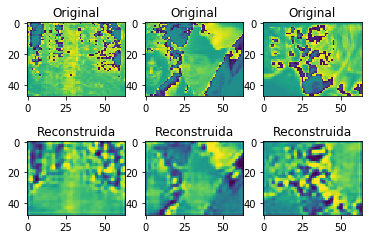

In [66]:
ind  = 3
y = ae.predict(test_images[:ind,:,:,:])
print(y.shape)
for i in range(ind):
  plt.subplot(2,ind,1+i)
  plt.imshow(test_images[i,:,:,0])
  plt.title("Original")
  plt.subplot(2,ind,ind + 1 + i)
  plt.title("Reconstruida")
  plt.imshow(y[i,:,:,0])